# Demo Notebook

This notebook aims to represent the DeepLabCut output analysis, using example data. 
So we begin by importing our packages, called for now "dlc". 

In [8]:
import dlc

#### Loading data
As an example, we will first work on a single file. Later, we'll try batch processing. We define the path where our file is, and with the function
`dlc.load_data.read_data` we will load our `.h5` file. 

In [ ]:
h5_path =  '/Users/annateruel/ca2+img-anna-2023-01-30/videos'
data = dlc.load_data.read_data( ,'/Users/annateruel/ca2+img-anna-2023-01-30/videos/0_neutro2DLC_resnet50_ca2+imgJan30shuffle1_500000.h5' 5, 30)

Since on this data file we have performed a tracking on the cage, we will define a list of bodyparts we want to work with. 

In [3]:
bodyparts = ['nose', 'rightear', 'leftear', 'head', 'sp1', 'sp2', 'tail']

In [4]:
import pandas as pd 
data = pd.read_hdf('/Users/annateruel/ca2+img-anna-2023-01-30/videos/0_neutro2DLC_resnet50_ca2+imgJan30shuffle1_500000.h5')

In [5]:
df2 = data.copy()

#### Get centroid from a list of bodyparts

One of the functions we can perform from the `data.py` file is to calculate the centroid of specified bodyparts in each dataframe. We can add this centroid coordinates (x,y) to our current dataframe. Let's try that!

#### Calculate interpolation

If the tracking of some bodyparts is not perfect, we can get the interpolation of those values with likelihood under a certain threshold. 

In [ ]:
df2 = data.copy() #we get a copy of the dataframe and work from there
df2 = dlc.data.get_interpolation()

In [ ]:
import numpy as np
DLCscorer = df2.columns[0][0]
threshold = 0.95
likelihood_col = (DLCscorer, 'nose', 'likelihood')
if df2[likelihood_col].lt(threshold).any():
    mask = df2[likelihood_col] < threshold

    df2.loc[mask, (DLCscorer, 'nose', 'x')] = np.nan
    df2.loc[mask, (DLCscorer, 'nose', 'y')] = np.nan

    df2[(DLCscorer, 'nose', 'x')] = df2[(DLCscorer, 'nose', 'x')].interpolate(method='linear')
    df2[(DLCscorer, 'nose', 'y')] = df2[(DLCscorer, 'nose', 'y')].interpolate(method='linear')

nose2 = df2.loc[:,(DLCscorer, 'nose', slice(None))]
nose2

In [ ]:
nose = data.loc[:, (slice(None), 'nose', slice(None))]
nose.loc[:,(slice(None), slice(None), 'x')]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(10, 10))

x = nose.loc[:, (slice(None), slice(None), 'x')].values
y = nose.loc[:, (slice(None), slice(None), 'y')].values
likelihood = nose.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()  # Flatten the array

# Create segments for LineCollection
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection object with segments and colormap
colormap = plt.cm.RdYlGn
lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
lc.set_array(likelihood)

ax.add_collection(lc)

# Add a colorbar to the plot to show what each color represents
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Likelihood Value')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_data(ax, data, title):
    x = data.loc[:, (slice(None), slice(None), 'x')].values
    y = data.loc[:, (slice(None), slice(None), 'y')].values
    likelihood = data.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()

    # Create segments for LineCollection
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection object with segments and colormap
    colormap = plt.cm.RdYlGn
    lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
    lc.set_array(likelihood)

    ax.add_collection(lc)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_title(title)
    
    return lc

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

lc1 = plot_data(ax1, nose, "Before Interpolation")
lc2 = plot_data(ax2, nose2, "After Interpolation")

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(lc2, cax=cbar_ax)
cbar.set_label('Likelihood Value')

plt.tight_layout()
plt.show()


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
lc1 = plot_data(ax1, nose, "Before Interpolation")
lc2 = plot_data(ax2, nose2, "After Interpolation")

## ROI Drawer

Testing ROI Drawer

In [1]:
from dlc.analysis.time_roi import ROIDrawer
import pandas as pd

In [4]:
video_path = '/Users/annateruel/Desktop/videos/7_WIN_20231010_094516_1.mp4'
out_dir = '/Users/annateruel/Desktop/'
roi_drawer = ROIDrawer(video_path, save_dir = out_dir, num_rois=2)
r = roi_drawer.draw_rois()

ERROR:root:An error occurred while drawing ROIs
ERROR:root:Traceback (most recent call last):
  File "/Users/annateruel/phd_code/dlc/analysis/time_roi.py", line 109, in draw_rois
    return self.h5_file_path, frame_path
NameError: name 'frame_path' is not defined



Button clicked, processing ROIs...
ROI DataFrame saved to: /Users/annateruel/Desktop/7_WIN_20231010_094516_1_20231220_171659.h5
Frame with ROIs saved to: /Users/annateruel/Desktop/7_WIN_20231010_094516_1_20231220_171659.png


In [3]:
save_dir = '/Users/annateruel/Desktop/videos/'
video_dir = '/Users/annateruel/Desktop/videos/'
roi_drawer = ROIDrawer(video_path = None, save_dir=save_dir)
roi_drawer.batch_processing(directory=video_dir, file_format='labeled.mp4')

## Testing time in ROI

1. Define ROIs

In [ ]:
import dlc.analysis.time_roi as time_roi
import pandas as pd
r = pd.read_hdf('/Users/annateruel/Desktop/coord_poly.h5')
roi_groups = r.groupby(['index', 'shape-type'])

polygons, _ = time_roi.PolygonROI.extract_polygons(roi_groups)

2. Get time (s) in each ROI for a given dataframe

In [2]:
time_in_roi = time_roi.TimeinRoi()
for poly in polygons:
    time_in_roi.add_roi(poly)

In [3]:
file_path = '/Users/annateruel/Desktop/videos/7_WIN_20231010_094516_1DLC_resnet50_capsaicin_malesOct20shuffle1_200000_filtered.h5'
directory = '/Users/annateruel/Desktop/videos/'

In [4]:
scorer = 'DLC_resnet50_capsaicin_malesOct20shuffle1_200000'
bodypart = 'Neck'

#tracking_data = time_in_roi.extract_tracking_data(file_path, scorer, bodypart)

In [5]:
time_spent = time_in_roi.time_in_rois_dir(directory, scorer, bodypart)

In [6]:
time_spent

,file,roi_index,time_in_roi
0,42_WIN_20231010_112657_1DLC_resnet50_capsaicin...,0,0
1,42_WIN_20231010_112657_1DLC_resnet50_capsaicin...,1,220
2,42_WIN_20231010_112657_1DLC_resnet50_capsaicin...,2,315
3,42_WIN_20231010_112657_1DLC_resnet50_capsaicin...,3,3123
4,73_WIN_20231117_102609DLC_resnet50_capsaicin_m...,0,0
...,...,...,...
83,57_WIN_20231010_093126_1DLC_resnet50_capsaicin...,3,1693
84,8_WIN_20231117_100458DLC_resnet50_capsaicin_ma...,0,0
85,8_WIN_20231117_100458DLC_resnet50_capsaicin_ma...,1,1
86,8_WIN_20231117_100458DLC_resnet50_capsaicin_ma...,2,565


In [10]:
dlc_df

scorer    DLC_resnet50_capsaicin_malesOct20shuffle1_200000              \
bodyparts                                             Nose               
coords                                                   x           y   
0                                               366.328339  428.636353   
1                                               366.287106  428.580673   
2                                               366.489343  429.014635   
3                                               367.936515  430.618056   
4                                               368.409275  431.674520   
...                                                    ...         ...   
17990                                           384.850441  327.976451   
17991                                           385.054334  327.104269   
17992                                           385.133755  326.554367   
17993                                           385.167561  326.437755   
17994                                           385.480187  326.545639   

scorer                                                               \
bodyparts               Ear_left                          Ear_right   
coords    likelihood           x           y likelihood           x   
0           0.840062  375.823853  426.417389   0.998564  361.153931   
1           0.849857  375.823823  426.275109   0.998079  361.143226   
2           0.806229  375.798223  422.421831   0.999098  363.422194   
3           0.786909  376.388900  421.822635   0.999189  362.376729   
4           0.855027  376.710931  422.414322   0.999442  361.671340   
...              ...         ...         ...        ...         ...   
17990       0.999871  381.565254  320.432923   0.999967  373.113982   
17991       0.999829  381.517484  320.270205   0.999958  373.084709   
17992       0.999810  381.499523  320.069990   0.999963  373.221653   
17993       0.999856  381.056071  320.535240   0.999976  373.236630   
17994       0.999846  380.631645  320.740594   0.999965  373.510338   

scorer                                        ...                         \
bodyparts                               Neck  ...                Spine_1   
coords              y likelihood           x  ... likelihood           x   
0          422.438995   0.999727  368.837433  ...   0.999749  369.228973   
1          422.330315   0.999383  368.818177  ...   0.999438  369.210896   
2          421.831344   0.999529  369.204875  ...   0.999498  369.450111   
3          424.157720   0.999529  369.281633  ...   0.999542  369.196936   
4          424.811275   0.999573  369.347102  ...   0.999600  369.449953   
...               ...        ...         ...  ...        ...         ...   
17990      325.332151   0.999988  375.578669  ...   0.999981  371.728620   
17991      324.835066   0.999984  375.282893  ...   0.999978  371.047415   
17992      324.392853   0.999980  375.547917  ...   0.999979  371.485638   
17993      325.109538   0.999985  375.143836  ...   0.999985  370.860187   
17994      325.276587   0.999984  375.055042  ...   0.999982  370.703247   

scorer                                                               \
bodyparts                            Spine_2                          
coords              y likelihood           x           y likelihood   
0          404.943512   0.999802  366.294342  389.338989   0.999918   
1          404.933059   0.999598  366.259083  389.308734   0.999868   
2          404.730961   0.999716  367.223822  389.387803   0.999874   
3          406.245084   0.999827  366.870639  390.867344   0.999874   
4          406.836850   0.999734  366.281594  392.175492   0.999845   
...               ...        ...         ...         ...        ...   
17990      311.468407   0.999994  363.029934  298.015765   0.999961   
17991      310.812587   0.999994  365.393977  297.844108   0.999956   
17992      310.425374   0.999993  363.153509  297.530074   0.999950   
17993      310.727414   0.999996  362.876867  297.4

## TRIALS

Testing some functions here: 

In [5]:
import dlc

In [6]:
bodyparts = ['nose', 'rightear', 'leftear', 'head']
file_path = '/Users/annateruel/sr-ca2+img-anna-2023-11-17/videos/AD22-56-neutro2-1DLC_dlcrnetms5_sr-ca2+imgNov17shuffle1_500000_filtered.h5'
title = 'Demo Plot'
path = '/Users/annateruel/sr-ca2+img-anna-2023-11-17/videos/'  

In [9]:
density_plot = dlc.plotting.TrackingPlot(style='light')


In [ ]:
density_plot.plot_directory(path, bodyparts, title)


## Video clustering for labelling

I want to create a function that can analyze a set of videos, perform a form of dimensionality reduction or clustering on them, and then identify which videos are most distinct from each other. This process will involve comparing videos based on the similarity of their pixel values, possibly in grayscale, to group similar videos into clusters. From each cluster, you can then select one representative video for labeling in your DeepLabCut model.

This is a test code to do that. 

In [11]:
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [12]:
def load_and_preprocess_video(video_path, frame_count=100):
    """
    This function takes a video path and extracts a fixed number of frames, converts them to grayscale, resizes, and flattens them.
    """    
    cap = cv2.VideoCapture(video_path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray_frame = cv2.resize(gray_frame, (100, 100))  # Resize for consistency
            frames.append(gray_frame.flatten())
            if len(frames) == frame_count:
                break
    finally:
        cap.release()
    return np.array(frames)

 The function load_and_preprocess_video you have is designed to process a single video. To create the video_features array that is needed for the rest of the PCA and clustering steps, you will need to call this function on each video in your directory and then average the frames to get a single feature vector for each video.

Here's how you can create a function to load and preprocess features for all videos in a directory, using your existing function:

In [13]:
def load_video_features_from_directory(video_directory, frame_count=100):
    """
    Loads and preprocesses video features for all videos in a directory.
    
    :param video_directory: The path to the directory containing the videos.
    :param frame_count: The number of frames to extract from each video.
    :return: A tuple of an array of video features and a list of video paths.
    """
    video_paths = [os.path.join(video_directory, f) for f in os.listdir(video_directory) if f.endswith('.mp4')]
    video_features = []

    for video_path in video_paths:
        # Use the provided function to load and preprocess the video
        preprocessed_frames = load_and_preprocess_video(video_path, frame_count)
        # Calculate the mean across all frames to get a single feature vector per video
        video_feature = np.mean(preprocessed_frames, axis=0)
        video_features.append(video_feature)

    return np.array(video_features), video_paths


In [18]:
video_directory = "/Users/annateruel/sdt_videos/"
video_features, video_paths = load_video_features_from_directory(video_directory)

The choice of setting the number of clusters to 5 was arbitrary and provided as a starting point for the example. In practice, the optimal number of clusters depends on the specific characteristics and distribution of your data.

To determine the most appropriate number of clusters, you can use several methods:

1. *Elbow Method*: Plot the sum of squared distances of samples to their closest cluster center for a range of number of clusters. Look for the “elbow” where the rate of decrease sharply changes, which can be considered an indicator of the optimal number of clusters.
2. *Silhouette Score*: Calculate the mean silhouette coefficient over all samples. This gives a perspective into the density and separation of the formed clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
3. *Gap Statistic*: Compares the total within intra-cluster variation for different values of k with their expected values under null reference distribution of the data. The optimal k is the one that maximizes the gap statistic.
4. *Domain Knowledge*: Sometimes the optimal number of clusters is suggested by the context of the problem or domain expertise.

Determining the best number of clusters for a dataset without domain knowledge can be challenging because it often depends on the context of the data and the goal of the clustering. However, there are several statistical methods that can help you decide. I will outline two of the most commonly used methods:

1. **The elbow method**: This method involves plotting the explained variance as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The idea is to choose a small value of k that still has a low sum of squared distances (inertia).

2. **The shilhouette method**: The silhouette value measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If many points have a high value, the clustering configuration is appropriate. If many points have a low or negative value, the clustering configuration may have too many or too few clusters.

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to calculate the Sum of Squared Distances (SSD) for different values of k
def calculate_ssd_for_k(reduced_features, k_range):
    ssd = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_features)
        ssd.append(kmeans.inertia_)
    return ssd

# Function to calculate silhouette scores for different values of k
def calculate_silhouette_for_k(reduced_features, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_features)
        score = silhouette_score(reduced_features, kmeans.labels_)
        silhouette_scores.append(score)
    return silhouette_scores

# Define the range of k you want to test
k_range = range(2, 11)

# Calculate SSD and silhouette scores
ssd = calculate_ssd_for_k(reduced_features, k_range)
silhouette_scores = calculate_silhouette_for_k(reduced_features, k_range)

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

# Plotting the Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.tight_layout()
plt.show()


In [19]:
import plotly.express as px 

def main(video_directory, n_clusters=15):
    video_paths = [os.path.join(video_directory, f) for f in os.listdir(video_directory) if f.endswith('.mp4')]
    video_features = []

    for video_path in video_paths:
        features = load_and_preprocess_video(video_path)
        video_features.append(np.mean(features, axis=0))  # Mean of frames as the video feature

    video_features = np.array(video_features)

    # Use 3 PCA components for 3D visualization
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(video_features)

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_features)
    labels = kmeans.labels_

    # Create a 3D scatter plot using Plotly
    fig = px.scatter_3d(
        reduced_features, x=0, y=1, z=2,
        color=labels,
        labels={'0': 'PCA Component 1', '1': 'PCA Component 2', '2': 'PCA Component 3'},
        title='PCA Clustering of Videos'
    )

    # Customize the plotly figure to display video names on hover
    hover_texts = [os.path.basename(video_path) for video_path in video_paths]
    fig.update_traces(marker_size=8, hoverinfo='text', text=hover_texts)

    fig.show()

    # Select one video from each cluster
    representative_videos = []
    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]
        representative_videos.append(video_paths[cluster_indices[0]])  # Select the first video of each cluster for simplicity

    print("Representative Videos:", representative_videos)

if __name__ == "__main__":
    main("/Users/annateruel/sdt_videos/")


/Users/annateruel/miniconda3/envs/dlc_analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Representative Videos: ['/Users/annateruel/sdt_videos/AD23-081-S1_3_bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-054_S1_bw_batch2.mp4', '/Users/annateruel/sdt_videos/AD23-085-S2_3_bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-086-S3_3__bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-081-S3_3__bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-080-S2_3_bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-87-S2_3_bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-053-S2_3_bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD22-130-S2_3_bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-100_S4_bw_batch2.mp4', '/Users/annateruel/sdt_videos/AD22-128-S3_3_bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-100_S3_bw_batch2.mp4', '/Users/annateruel/sdt_videos/AD23-092_S5_bw_batch2.mp4', '/Users/annateruel/sdt_videos/AD23-080-S3_3__bw_batch1.mp4', '/Users/annateruel/sdt_videos/AD23-054_S5_bw_batch2.mp4']


## trying lr and loss plotting

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_path = '/Users/annateruel/Desktop/learning_stats2.csv' 
df = pd.read_csv(data_path, sep=';', decimal=',', engine='python')
df

,iterations,loss,lr
0,1000,0.02260,0.0100
1,2000,0.01550,0.0100
2,3000,0.01400,0.0100
3,4000,0.01310,0.0100
4,5000,0.01270,0.0100
...,...,...,...
363,414000,0.00322,0.0005
364,415000,0.00312,0.0005
365,416000,0.00325,0.0005
366,417000,0.00330,0.0005


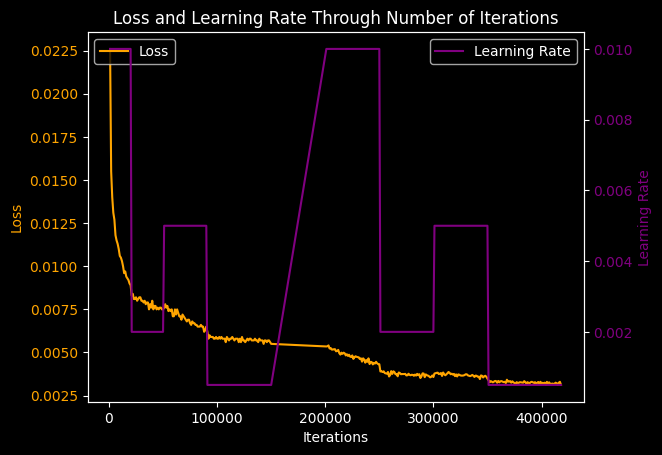

In [12]:
plt.style.use("dark_background")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the loss on the primary y-axis
ax1.plot(df['iterations'], df['loss'], color='orange', label='Loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the learning rate
ax2 = ax1.twinx()
ax2.plot(df['iterations'], df['lr'], color='purple', label='Learning Rate')
ax2.set_ylabel('Learning Rate', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Show the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('Loss and Learning Rate Through Number of Iterations')
plt.show()

In [1]:
import pandas as pd
pd.read_hdf('/Users/annateruel/Downloads/CollectedData_Paola.h5')

scorer                                                    Paola               \
individuals                                         individual1                
bodyparts                                                  beak                
coords                                                        x            y   
labeled-data DJI_20231011121723_0076_D img0056.png  1377.889896  1343.359701   
                                       img0082.png  1404.054496  1213.543339   
                                       img0096.png  1404.054496  1108.885187   
                                       img0117.png  1394.997540   924.727093   
                                       img0268.png  1355.750733   568.486845   
                                       img0367.png  1330.592462   377.284436   
                                       img0370.png  1335.624104   365.208496   
                                       img0433.png  1405.060824   206.208599   
                                       img0518.png  1432.231691    97.525134   
                                       img0590.png  1536.889843   106.582089   
                                       img0780.png  1505.693663   354.138884   
                                       img0805.png  1508.712648   343.069271   
                                       img0934.png  1497.643036   261.556672   
                                       img1000.png  1505.693663    73.373249   
                                       img1036.png          NaN          NaN   
                                       img1071.png          NaN          NaN   

scorer                                                                \
individuals                                                            
bodyparts                                          left flipper base   
coords                                                             x   
labeled-data DJI_20231011121723_0076_D img0056.png       1255.117834   
                                       img0082.png       1336.630494   
                                       img0096.png               NaN   
                                       img0117.png       1372.858316   
                                       img0268.png       1367.826674   
                                       img0367.png       1327.573477   
                                       img0370.png               NaN   
                                       img0433.png               NaN   
                                       img0518.png               NaN   
                                       img0590.png               NaN   
                                       img0780.png               NaN   
                                       img0805.png               NaN   
                                       img0934.png               NaN   
                                       img1000.png               NaN   
                                       img1036.png               NaN   
                                       img1071.png               NaN   

scorer                                                           \
individuals                                                       
bodyparts                                                         
coords                                                        y   
labeled-data DJI_20231011121723_0076_D img0056.png  1497.327944   
                                       img0082.png  1376.568538   
                                       img0096.png          NaN   
                                       img0117.png  1075.676351   
                                       img0268.png   707.360162   
                                       img0367.png   517.164082   
                                       img0370.png          NaN   
                                       img0433.png          NaN   
                                       img0518.png          NaN   
                                       img0590.png          NaN   
                    